In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install face_recognition opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=81bf7c5b4b1cb84eb8c1a36a1aaed878f5bf80454770e366a682c91781c785cf
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=ed0f51420e0de36db43b2592b42ac6ad0d1bb0e9231938d708b43d5c79b3784c
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


Action: emotion: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


DeepFace analysis returned an unexpected format: [{'age': 26, 'region': {'x': 16, 'y': 12, 'w': 139, 'h': 139}, 'face_confidence': 5.676387061306741, 'gender': {'Woman': 0.3124940674751997, 'Man': 99.68750476837158}, 'dominant_gender': 'Man', 'emotion': {'angry': 0.0018411408370211468, 'disgust': 5.094457137241137e-07, 'fear': 0.42522926402339173, 'happy': 98.87881888403668, 'sad': 0.032172307494976224, 'surprise': 0.1571182556346648, 'neutral': 0.5048136090709437}, 'dominant_emotion': 'happy'}]


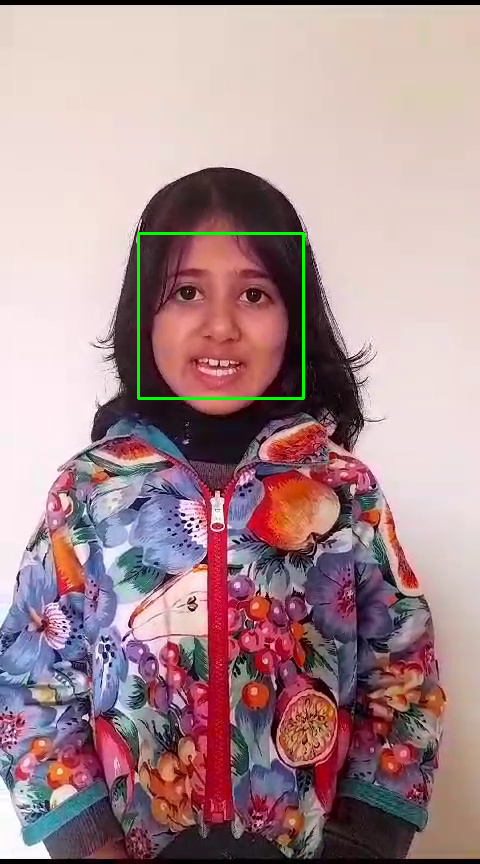

In [ ]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def analyze_sentiment(image_path):
    # Read the image from the given path
    image = cv2.imread(image_path)

    # Load the Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Extract the detected face region
        face_region = image[y:y+h, x:x+w]

        # Perform analysis using DeepFace
        try:
            analysis = DeepFace.analyze(face_region, actions=["age", "gender", "emotion"])

            if isinstance(analysis, dict):
                print("Age:", analysis["age"])
                print("Gender:", analysis["gender"])
                print("Emotion:", analysis["dominant_emotion"])
            else:
                print("DeepFace analysis returned an unexpected format:", analysis)

        except Exception as e:
            print("Error in DeepFace analysis:", e)

        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Use cv2_imshow to display the image in Colab
    cv2_imshow(image)

if __name__ == "__main__":
    # Specify the path to the image
    image_path = "/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg"

    # Analyze sentiment in the image
    analyze_sentiment(image_path)


In [ ]:
!pip uninstall -y dlib


Found existing installation: dlib 19.24.2
Uninstalling dlib-19.24.2:
  Successfully uninstalled dlib-19.24.2


In [ ]:
!git clone https://github.com/davisking/dlib.git
%cd dlib
!python setup.py install --no DLIB_USE_CUDA
%cd ..


In [ ]:
!pip install face_recognition


In [ ]:
!pip install opencv-python


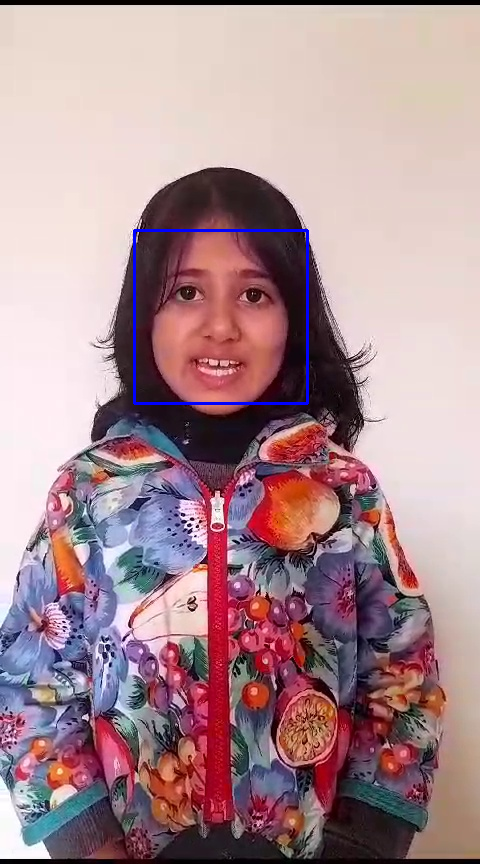

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def detect_faces_opencv(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Load the Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the result using cv2_imshow
    cv2_imshow(image)

if __name__ == "__main__":
    # Specify the path to your image
    image_path = "/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg"
    detect_faces_opencv(image_path)


In [ ]:
!pip install fer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6080 sha256=ff981ab9703e23ecd840b4ae5831a7d46f814d3b632527839001719d96b2a3c1
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


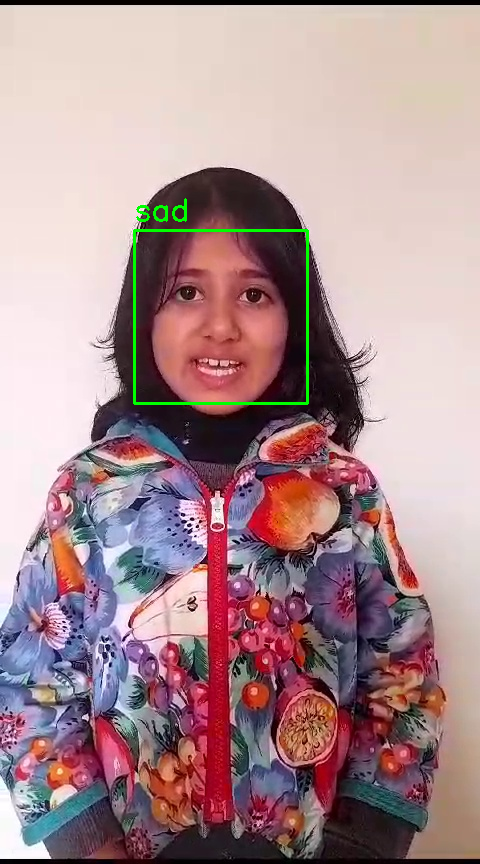

In [ ]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow

def detect_emotion_with_fer(image_path):
    # Initialize the FER detector
    detector = FER()

    # Load the image
    image = cv2.imread(image_path)

    # Detect emotions
    result = detector.detect_emotions(image)

    # Draw rectangles and emotion labels around each detected face
    for face in result:
        x, y, w, h = face["box"]
        emotions = face["emotions"]
        dominant_emotion = max(emotions, key=emotions.get)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the result
    cv2_imshow(image)

# Provide the path to your image
detect_emotion_with_fer("/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg")


Face 1:
Emotions: {'angry': 0.05, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.28, 'sad': 0.55, 'surprise': 0.0, 'neutral': 0.03}
Dominant Emotion: sad



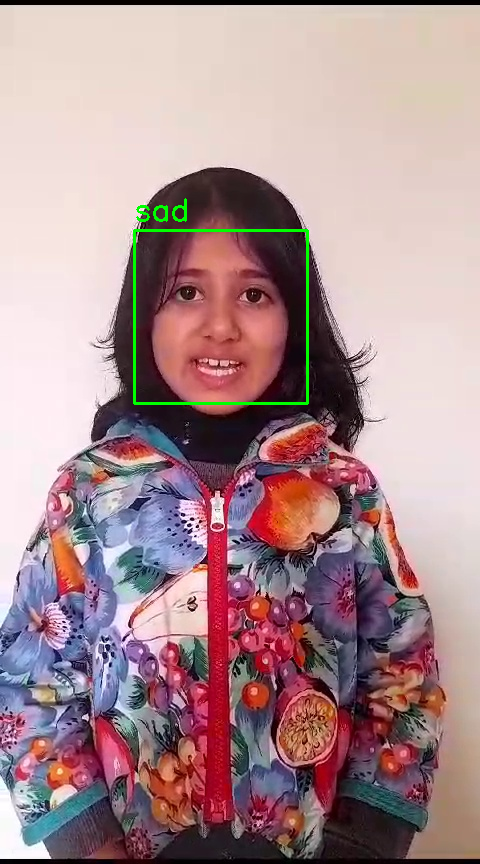

In [ ]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow

def detect_emotion_with_fer(image_path):
    # Initialize the FER detector
    detector = FER()

    # Load the image
    image = cv2.imread(image_path)

    # Detect emotions
    result = detector.detect_emotions(image)

    # Check if result is empty (no faces detected)
    if not result:
        print("No faces detected in the image.")
        return

    # Process each detected face
    for index, face in enumerate(result):
        x, y, w, h = face["box"]
        emotions = face["emotions"]
        dominant_emotion = max(emotions, key=emotions.get)

        # Print the results
        print(f"Face {index + 1}:")
        print(f"Emotions: {emotions}")
        print(f"Dominant Emotion: {dominant_emotion}\n")

        # Draw rectangle and emotion label around the detected face
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the result
    cv2_imshow(image)

# Provide the path to your image
detect_emotion_with_fer("/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg")


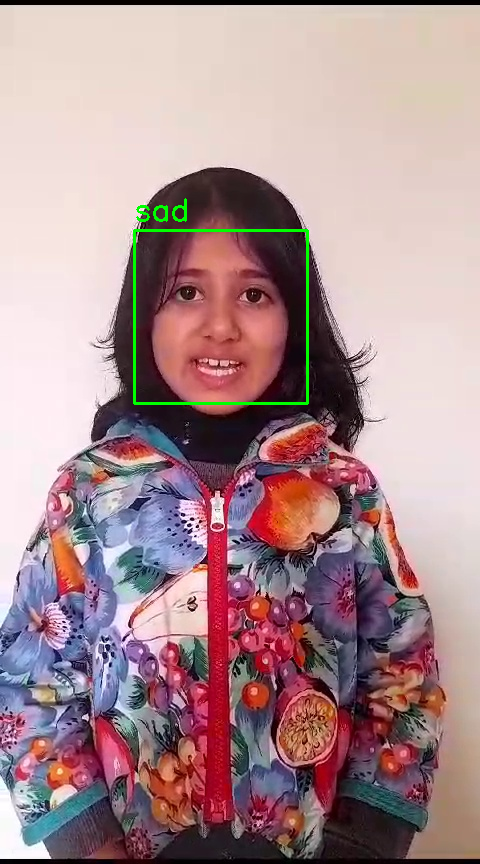

Error in DeepFace analysis for face 1: list indices must be integers or slices, not str


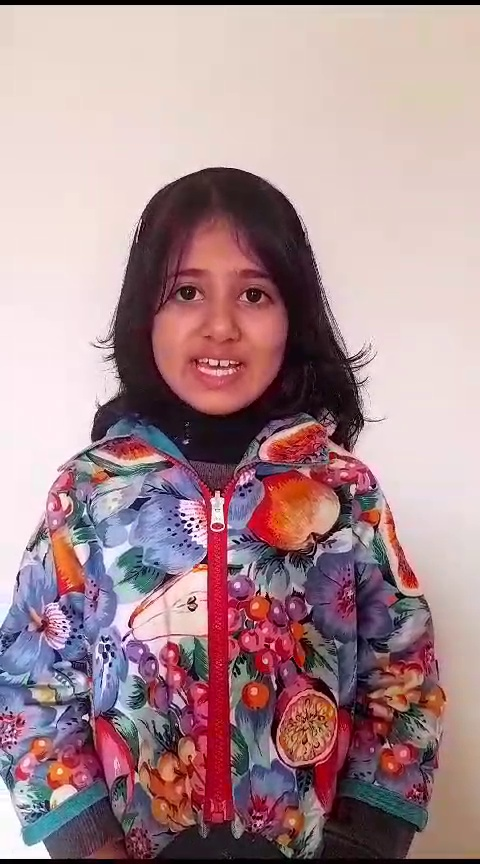

  FER Emotion  DeepFace Emotion
0         sad  No face detected
Comparison: [('sad', 'No face detected')]


In [ ]:
import cv2
import pandas as pd
from fer import FER
from deepface import DeepFace
from google.colab.patches import cv2_imshow

def detect_emotion_with_fer(image_path):
    detector = FER()
    image = cv2.imread(image_path)
    results = detector.detect_emotions(image)
    if not results:
        print("No faces detected by FER in the image.")
        return None
    fer_emotions = {}
    for index, face in enumerate(results):
        x, y, w, h = face["box"]
        dominant_emotion = max(face["emotions"], key=face["emotions"].get)
        fer_emotions[index] = dominant_emotion
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(image)
    return fer_emotions

def analyze_sentiment_deepface(image_path):
    image = cv2.imread(image_path)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        print("No faces detected by DeepFace in the image.")
        return None
    deepface_emotions = {}
    for index, (x, y, w, h) in enumerate(faces):
        face_region = image[y:y+h, x:x+w]
        try:
            analysis = DeepFace.analyze(face_region, actions=['emotion'])
            dominant_emotion = analysis["emotion"]["dominant_emotion"]
            deepface_emotions[index] = dominant_emotion
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        except Exception as e:
            print(f"Error in DeepFace analysis for face {index + 1}: {e}")
    cv2_imshow(image)
    return deepface_emotions

def compare_results(fer_results, deepface_results):
    if fer_results is None or deepface_results is None:
        return "Comparison not possible due to missing results."

    comparison = []
    total_faces = max(len(fer_results), len(deepface_results))
    for i in range(total_faces):
        fer_emotion = fer_results.get(i, "No face detected")
        deepface_emotion = deepface_results.get(i, "No face detected")
        comparison.append((fer_emotion, deepface_emotion))
    return comparison

# Image paths
image_path = "/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg"

# Analyze the images
fer_results = detect_emotion_with_fer(image_path)
deepface_results = analyze_sentiment_deepface(image_path)

# Compare the results
comparison = compare_results(fer_results, deepface_results)
# Convert the comparison results to a pandas DataFrame for better visualization
comparison_df = pd.DataFrame(comparison, columns=['FER Emotion', 'DeepFace Emotion'])

# Print the DataFrame
print(comparison_df)
# Print comparison results
print("Comparison:", comparison)


In [ ]:
import cv2
from fer import FER
from deepface import DeepFace
import pandas as pd

def detect_emotion_with_fer(image_path):
    detector = FER()
    image = cv2.imread(image_path)
    results = detector.detect_emotions(image)
    if not results:
        print("No faces detected by FER in the image.")
        return None
    return results[0]["emotions"]  # Assuming we're interested in the first detected face

def analyze_sentiment_deepface(image_path):
    try:
        analysis = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        # Handling the case where analysis is a list
        if isinstance(analysis, list):
            analysis = analysis[0]
        return analysis
    except Exception as e:
        print(f"Error in DeepFace analysis: {e}")
        return None

# Replace with the path to your image
image_path = "/content/gdrive/MyDrive/work2/sample/New_Video37@5@frame_167.jpg"

# Analyzing the image with both models
fer_results = detect_emotion_with_fer(image_path)
deepface_results = analyze_sentiment_deepface(image_path)

# Displaying the results
if fer_results and deepface_results:
    data = {
        "DeepFace Dominant Emotion": deepface_results.get("dominant_emotion", "Not Detected"),
        "FER Dominant Emotion": max(fer_results, key=fer_results.get) if fer_results else "Not Detected",
        "DeepFace Emotions": deepface_results.get("emotion", {}),
        "FER Emotions": fer_results
    }
    comparison_df = pd.DataFrame([data])
    print(comparison_df)
else:
    print("Could not analyze the image with one or both models.")



  DeepFace Dominant Emotion FER Dominant Emotion  \
0                     happy                  sad   

                                   DeepFace Emotions  \
0  {'angry': 2.472757439582653, 'disgust': 0.0272...   

                                        FER Emotions  
0  {'angry': 0.05, 'disgust': 0.0, 'fear': 0.07, ...  
